In [18]:
import sqlite3

In [19]:
conn = sqlite3.connect(':memory:')

In [20]:
cursor = conn.cursor()

In [21]:
cursor.executescript(
    """
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    """
)

`cursor.executescript(...)` → Executes **multiple SQL statements** at once.

`CREATE TABLE IF NOT EXISTS mytable2 (...)`:
- Ensures that `mytable2` exists before creating it, preventing errors if it already exists.
- Defines **4 columns**:
    - `col1 TEXT NOT NULL` → Cannot be `NULL`, stores text.
    - `col2 TEXT` → Optional text column.
    - `col3 INTEGER UNIQUE` → Must be an **integer**, values must be **unique**.
    - `col4 REAL NOT NULL UNIQUE` → Must be a **real (decimal) number**, must be **unique**, cannot be `NULL`.

**The same table creation statement is duplicated** within `executescript()`, which is unnecessary.


In [22]:
cursor.execute('PRAGMA table_info("mytable2")').fetchall()

[(0, 'col1', 'TEXT', 1, None, 0),
 (1, 'col2', 'TEXT', 0, None, 0),
 (2, 'col3', 'INTEGER', 0, None, 0),
 (3, 'col4', 'REAL', 1, None, 0)]

`PRAGMA table_info("mytable2")` → This **queries metadata** about the structure of the table `mytable2`, returning details about its columns.

`.execute(...)` → Runs the SQL command using the SQLite cursor.

`.fetchall()` → Retrieves **all rows** from the result, returning them as a **list of tuples**.`

In [23]:
conn.execute("""
INSERT INTO mytable2
VALUES ('hello', 'value', 123, 1.23)
""")

`INSERT INTO mytable2` → Specifies that a new row is being inserted into the `mytable2` table.  
`VALUES ('hello', 'value', 123, 1.23)` → Provides **four values** that match the **columns** in `mytable2`:
- `'hello'` → First column (`col1`, TEXT)
- `'value'` → Second column (`col2`, TEXT)
- `123` → Third column (`col3`, INTEGER)
- `1.23` → Fourth column (`col4`, REAL)  

`conn.execute(...)` → Executes the SQL command using the SQLite connection (conn).

In [24]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 123, 1.23)]

This indicates that the table `mytable2` contains **one row**:  
`'hello'` → First column (`col1`, TEXT)  
`'value'` → Second column (`col2`, TEXT)  
`123` → Third column (`col3`, INTEGER)  
`1.23` → Fourth column (`col4`, REAL)  


In [27]:
col1 = 'hello'
col2 = 'value'
col3 = 124
col4 = 1.24
conn.execute(f"""
INSERT INTO mytable2
VALUES ('{col1}', '{col2}', {col3}, {col4})
""")

This code inserts a new row into the SQLite table `mytable2` with the following values:
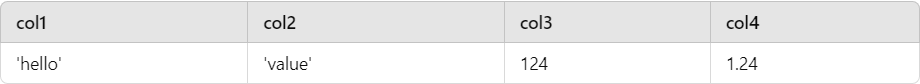

In [28]:
conn.execute(f"""
INSERT INTO mytable2
VALUES ('hello', 'value', 42, 5.555)
""")

- The `INSERT INTO mytable2` command is used to add a new row into the `mytable2` table.
- The VALUES (`'hello'`, `'value'`, `42`, `5.555`) correspond to the table's columns.

In [30]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 123, 1.23),
 ('hello', 'value', 124, 1.24),
 ('hello', 'value', 42, 5.555)]

The `SELECT * FROM mytable2` statement selects **all columns** (`*` means all) and **all rows** from the `mytable2` table.

The `.fetchall()` method retrieves all the rows and stores them as a list of tuples.

In [13]:
col1 = 'hello'
col2 = 'value'
col3 = 24234
col4 = 322.2
conn.execute(f"""
INSERT INTO mytable2
VALUES ('{col1}', '{col2}', {col3}, {col4})
""")

**Variable Assignment**  
- `col1 = 'hello'` → First column (`TEXT`)
- `col2 = 'value'` → Second column (`TEXT`)
- `col3 = 24234` → Third column (`INTEGER`)
- `col4 = 322.2` → Fourth column (`REAL`)

**Formatted SQL Query**
- The `f"""..."""` **f-string** dynamically inserts these values into the `INSERT INTO` statement.
- This **adds a new row** into `mytable2` with the given values.

In [31]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 123, 1.23),
 ('hello', 'value', 124, 1.24),
 ('hello', 'value', 42, 5.555)]

In [21]:
col1 = "hello', 'world', 464, 454.3); DROP TABLE mytable2; --"
col2 = 'value'
col3 = 24234
col4 = 322.2
print(f"""
INSERT INTO mytable2
VALUES ('{col1}', '{col2}', {col3}, {col4})
""")


INSERT INTO mytable2
VALUES ('hello', 'world', 464, 454.3); DROP TABLE mytable2; --', 'value', 24234, 322.2)



`SELECT * FROM mytable2` → This SQL query retrieves **all columns** (`*`) and **all rows** from the table mytable2.  
`.fetchall()` → Retrieves all the rows returned by the query as a list of tuples.

In [32]:
col1 = "hello', 'world', 464, 454.3); DROP TABLE mytable2; --"
col2 = 'value'
col3 = 24234
col4 = 322.2
conn.executescript(f"""
INSERT INTO mytable2
VALUES ('{col1}', '{col2}', {col3}, {col4})
""")

This code is an example of an **SQL Injection Attack**
- Variable `col1` contains a malicious **SQL payload**:
    - The input **closes the `VALUES` clause** of the `INSERT` statement.
    - Appends **another SQL command**: `DROP TABLE mytable2;`
        - This command **deletes the table**
    - The `--` at the end **comments out** anything following it, preventing syntax errors.
- **SQL Command Executed:** The `executescript(f"""...""")` function runs the following **dangerous SQL query**:  
    `INSERT INTO mytable2 VALUES ('hello', 'world', 464, 454.3);`  
    `DROP TABLE mytable2;`
- The first command **inserts a row** into `mytable2`.  
- The second command **deletes the entire table** `mytable2`.

In [33]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

OperationalError: no such table: mytable2

The `OperationalError` proves that the table `mytable2` does not exist and was **deleted**

In [35]:
cursor.executescript(
    """
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    """
)

`cursor.executescript(""" ... """)`:
- This method executes multiple SQL statements at once.

`CREATE TABLE IF NOT EXISTS mytable2 (...)`:
- This statement **creates** `mytable2` **only if it does not already exist**.
- It defines four columns:
    - `col1` **(TEXT, NOT NULL)** → Cannot be empty.
    - `col2` **(TEXT)** → Can store text, but is not required.
    - `col3` **(INTEGER, UNIQUE)** → Must be a unique integer (no duplicates).
    - `col4` **(REAL, NOT NULL, UNIQUE)** → Must be a unique floating-point number, cannot be empty.

**Duplicate** `CREATE TABLE` **statement**:
- The **second identical** `CREATE TABLE` **statement** is **redundant** because:
    - The **first one already ensures** the table exists.  
    - SQLite **ignores the second statement** since the table was already created.


In [36]:
col1 = "hello"
col2 = 'value'
col3 = 24234
col4 = 322.2
conn.execute("""
INSERT INTO mytable2
VALUES (?, ?, ?, ?)
""",
            (col1, col2, col3, col4)
            )

In [26]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 24234, 322.2)]

In [40]:
col1 = "hello', 'world', 464, 454.3); DROP TABLE mytable2; --"
col2 = 'value'
col3 = 213
col4 = 5676.21
conn.execute("""
INSERT INTO mytable2
VALUES (?, ?, ?, ?)
""",
            (col1, col2, col3, col4)
            )

- `col1` contains a **malicious SQL injection attempt** (`DROP TABLE mytable2; --`).
- The other columns contain **valid data types** (text, integer, real number).
- **Parameterized query (`?` placeholders):**
    - Instead of directly inserting variables into the SQL string, `?` placeholders are used.
    - The **actual values** (`col1, col2, col3, col4`) are provided **separately as a tuple.**
- **Prevents SQL injection:**
    - If `col1` was directly formatted in the query, SQLite would **execute** `DROP TABLE mytable2; --`, deleting the table.
    - **Using** `?` **ensures that** `col1` **is treated as a string**, not SQL code.
        - Parameterized queries `?` **preserve the original data types** (INTEGER, REAL, TEXT, etc.)

In [41]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 24234, 322.2),
 ("hello', 'world', 464, 454.3); DROP TABLE mytable2; --",
  'value',
  213,
  5676.21)]

- `SELECT * FROM mytable2`:
    - selects **all columns and all rows** from `mytable2`
    - `*` → Selects **all columns** in the table.
- `.fetchall()`: 
    - Retrieves all rows as a list of tuples.

In [ ]:
conn.executemany(
    """
    INSERT INTO mytable2
    VALUES (?, ?, ?, ?)
    """,
    [("hello", "bsdsba", 2027, 0.1), ("hi", "dmw", 2025, 23.3)],
)

- The `executemany` method is used to **insert multiple rows at once** into `mytable2`.
- The `VALUES (?, ?, ?, ?)` placeholders ensure that the provided **tuples of values** are inserted **safely.**
- The **two tuples** in the list **each represent one row**, meaning **2 new rows** are inserted into `mytable2`.

In [45]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 24234, 322.2),
 ("hello', 'world', 464, 454.3); DROP TABLE mytable2; --",
  'value',
  213,
  5676.21),
 ('hello', 'bsdsba', 2027, 0.1),
 ('hi', 'dmw', 2025, 23.3)]

In [46]:
conn.execute("""
INSERT INTO mytable2
VALUES (:col1, :col2, :col3, :col4)
""",
            {'col1': 'foo', 'col2': 'bar', 'col3': 32, 'col4': 34.8}
            )

- This tells SQLite to **insert values** into mytable2 where:
    - `:col1` → Maps to a value for `col1`
    - `:col2` → Maps to a value for `col2`
    - `:col3` → Maps to a value for `col3`
    - `:col4` → Maps to a value for `col4`
- These **keys match** the named placeholders in the SQL query.
- The values `('foo', 'bar', 32, 34.8)` will be **dynamically inserted** into `mytable2`.

In [47]:
conn.execute("""
SELECT * FROM mytable2
""").fetchall()

[('hello', 'value', 24234, 322.2),
 ("hello', 'world', 464, 454.3); DROP TABLE mytable2; --",
  'value',
  213,
  5676.21),
 ('hello', 'bsdsba', 2027, 0.1),
 ('hi', 'dmw', 2025, 23.3),
 ('foo', 'bar', 32, 34.8)]

In [48]:
import pandas as pd

In [10]:
pd.read_sql_table('players', 'sqlite:///source/sql-exercises/exercises.db')

,name,games_played,wins,total_score
0,Gino B.,69,192,101
1,Big D,23,88,46
2,VD,18,49,57
3,Bossti,77,256,108


`pd.read_sql_table()`
- This function reads an **entire SQL table** into a Pandas DataFrame.
    
**Arguments Used:**
- `'players'` → Specifies the table **name** (`players`).  
- `'sqlite:///source/sql-exercises/exercises.db'` → The **SQLite database file path** (`exercises.db`).